#### To use the Random Forest Survival analysis you will need to use the Pysurvival package.
To install this package please follow the instructions from this site https://square.github.io/pysurvival/installation.html
##### For MacOS users:
You will need to add two more lines besides the recommended 2 as shown below:
###### Note: please check which version of gcc do you have as it might be different from 9.3.0.



### To use the Random Forest Survival analysis we need to load the data and remove the colinear features

In [15]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### using the panda reader import your file where the data is contained

In [16]:
clinical_data=pd.read_excel('clin_data.xlsx')

clinical_data

filename  FFLP  FFLP_in_months  \
0    18284004043     0             0.8   
1    20243743626     0             1.1   
2    20444767425     1            36.3   
3    20525126502     1             2.0   
4    20542019984     1             2.5   
..           ...   ...             ...   
79  211310175445     1             3.8   
80  211401772640     1             9.5   
81  211502540723     1             4.4   
82  211545340988     1            13.1   
83  215758266276     1             4.5   

                   diagnostics_Image-original_Spacing  \
0                 (0.9375, 0.9375, 1.218231201171875)   
1             (0.976562, 0.976562, 2.500000000000001)   
2             (0.976562, 0.976562, 2.500000000000001)   
3        (1.14453125, 1.14453125, 3.0000000000000004)   
4   (0.9765624999999998, 0.9765624999999998, 2.999...   
..                                                ...   
79      (0.9765625000000002, 0.9765625000000002, 2.0)   
80      (1.1718749999999998, 1.1718749999999998, 2.0)   
81  (0.9765624999999998, 0.9765624999999998, 2.999...   
82                      (1.07421875, 1.07421875, 2.0)   
83            (0.976562, 0.976562, 2.500000000000001)   

    diagnostics_Image-original_Mean  original_shape_MajorAxisLength  \
0                          0.085291                      206.351060   
1                          0.066494                      137.568410   
2                          0.084962                      191.981316   
3                          0.062180                      266.796480   
4                          0.054680                   478343.000000   
..                              ...                             ...   
79                         0.063273                   938032.000000   
80                         0.044872                   565274.000000   
81                         0.074059                   629500.000000   
82                         0.081775                   883970.000000   
83                         0.068691                   396209.000000   

    original_shape_Maximum2DDiameterColumn  original_shape_Maximum3DDiameter  \
0                               191.512165                        228.461403   
1                               149.512940                        168.919628   
2                               218.335061                        226.247648   
3                               295.046283                        300.551338   
4                                 1.000000                          0.274078   
..                                     ...                               ...   
79                                1.000000                          0.219055   
80                                1.000000                          0.267947   
81                                1.000000                          0.272925   
82                                3.000000                          0.281658   
83                                1.000000                          0.273283   

    original_shape_MeshVolume  original_shape_MinorAxisLength  ...  \
0                1.516300e+06                      125.444723  ...   
1                8.994795e+05                      109.224397  ...   
2                1.488096e+06                      114.298757  ...   
3                3.100770e+06                      150.802062  ...   
4                1.744043e-02                        0.442152  ...   
..                        ...                             ...  ...   
79               1.123862e-01                        0.255243  ...   
80               1.417342e-01                        1.000000  ...   
81               3.144191e-02                        0.790224  ...   
82               6.112728e-02                        0.353797  ...   
83               2.775558e-17                        1.000000  ...   

    original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                    4.984794e-13   
1                                    5.000000e-01   
2   

In [17]:
# in this data sets certain rows are excluded so we have to remove them 
data=clinical_data.drop([]).reset_index(drop=True)

data.columns

Index(['filename', 'FFLP', 'FFLP_in_months',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Mean',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=107)

In [18]:
data['time column']=clinical_data['FFLP_in_months']
data['event column']=clinical_data['FFLP']

In [19]:
data1=data.drop(columns=['filename'])
data1.to_csv('for_survival.csv')

In [20]:
lola=data1.iloc[:,0:255]
lola.columns

Index(['FFLP', 'FFLP_in_months', 'diagnostics_Image-original_Spacing',
       'diagnostics_Image-original_Mean', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       ...
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'time column',
       'event column'],
      dtype='object', length=108)

In [21]:
time_column='time column'
event_column='event column'
features=np.setdiff1d(data1.columns, [time_column, event_column]).tolist()
len(features)

106

### We will be using Variance Inflation Factor to remove the colinear features
In the RFS analysis it is very important to remove the colinear features

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=20.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [24]:
#VIF of 10 means that all the features with R^2 above 0.9 will removed
X=lola
calculate_vif_(X, 10)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [25]:
#creating a new dataframe with colinear features removed
data2=data1.loc[:, ['LBP94', 'LBP101', 'LBP106', 'LBP107', 'LBP108', 'LBP112', 'LBP116',
       'LBP118', 'LBP119', 'LBP120', 'FD27', 'FD51', 'FD54', 'ACM1_12', 'time column', 'event column']]
data2

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['LBP94', 'LBP101', 'LBP106', 'LBP107', 'LBP108',\n       ...\n       'LBP120', 'FD27', 'FD51', 'FD54', 'ACM1_12'],\n      dtype='object', length=14). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [28]:
#create a dataframe with time and event columns
data2 = clinical_data
time_column='time column'
event_column='event column'
features=np.setdiff1d(data2.columns, [time_column, event_column]).tolist()
len(features)
features
data2

filename  FFLP  FFLP_in_months  \
0    18284004043     0             0.8   
1    20243743626     0             1.1   
2    20444767425     1            36.3   
3    20525126502     1             2.0   
4    20542019984     1             2.5   
..           ...   ...             ...   
79  211310175445     1             3.8   
80  211401772640     1             9.5   
81  211502540723     1             4.4   
82  211545340988     1            13.1   
83  215758266276     1             4.5   

                   diagnostics_Image-original_Spacing  \
0                 (0.9375, 0.9375, 1.218231201171875)   
1             (0.976562, 0.976562, 2.500000000000001)   
2             (0.976562, 0.976562, 2.500000000000001)   
3        (1.14453125, 1.14453125, 3.0000000000000004)   
4   (0.9765624999999998, 0.9765624999999998, 2.999...   
..                                                ...   
79      (0.9765625000000002, 0.9765625000000002, 2.0)   
80      (1.1718749999999998, 1.1718749999999998, 2.0)   
81  (0.9765624999999998, 0.9765624999999998, 2.999...   
82                      (1.07421875, 1.07421875, 2.0)   
83            (0.976562, 0.976562, 2.500000000000001)   

    diagnostics_Image-original_Mean  original_shape_MajorAxisLength  \
0                          0.085291                      206.351060   
1                          0.066494                      137.568410   
2                          0.084962                      191.981316   
3                          0.062180                      266.796480   
4                          0.054680                   478343.000000   
..                              ...                             ...   
79                         0.063273                   938032.000000   
80                         0.044872                   565274.000000   
81                         0.074059                   629500.000000   
82                         0.081775                   883970.000000   
83                         0.068691                   396209.000000   

    original_shape_Maximum2DDiameterColumn  original_shape_Maximum3DDiameter  \
0                               191.512165                        228.461403   
1                               149.512940                        168.919628   
2                               218.335061                        226.247648   
3                               295.046283                        300.551338   
4                                 1.000000                          0.274078   
..                                     ...                               ...   
79                                1.000000                          0.219055   
80                                1.000000                          0.267947   
81                                1.000000                          0.272925   
82                                3.000000                          0.281658   
83                                1.000000                          0.273283   

    original_shape_MeshVolume  original_shape_MinorAxisLength  ...  \
0                1.516300e+06                      125.444723  ...   
1                8.994795e+05                      109.224397  ...   
2                1.488096e+06                      114.298757  ...   
3                3.100770e+06                      150.802062  ...   
4                1.744043e-02                        0.442152  ...   
..                        ...                             ...  ...   
79               1.123862e-01                        0.255243  ...   
80               1.417342e-01                        1.000000  ...   
81               3.144191e-02                        0.790224  ...   
82               6.112728e-02                        0.353797  ...   
83               2.775558e-17                        1.000000  ...   

    original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                    4.984794e-13   
1                                    5.000000e-01   
2   

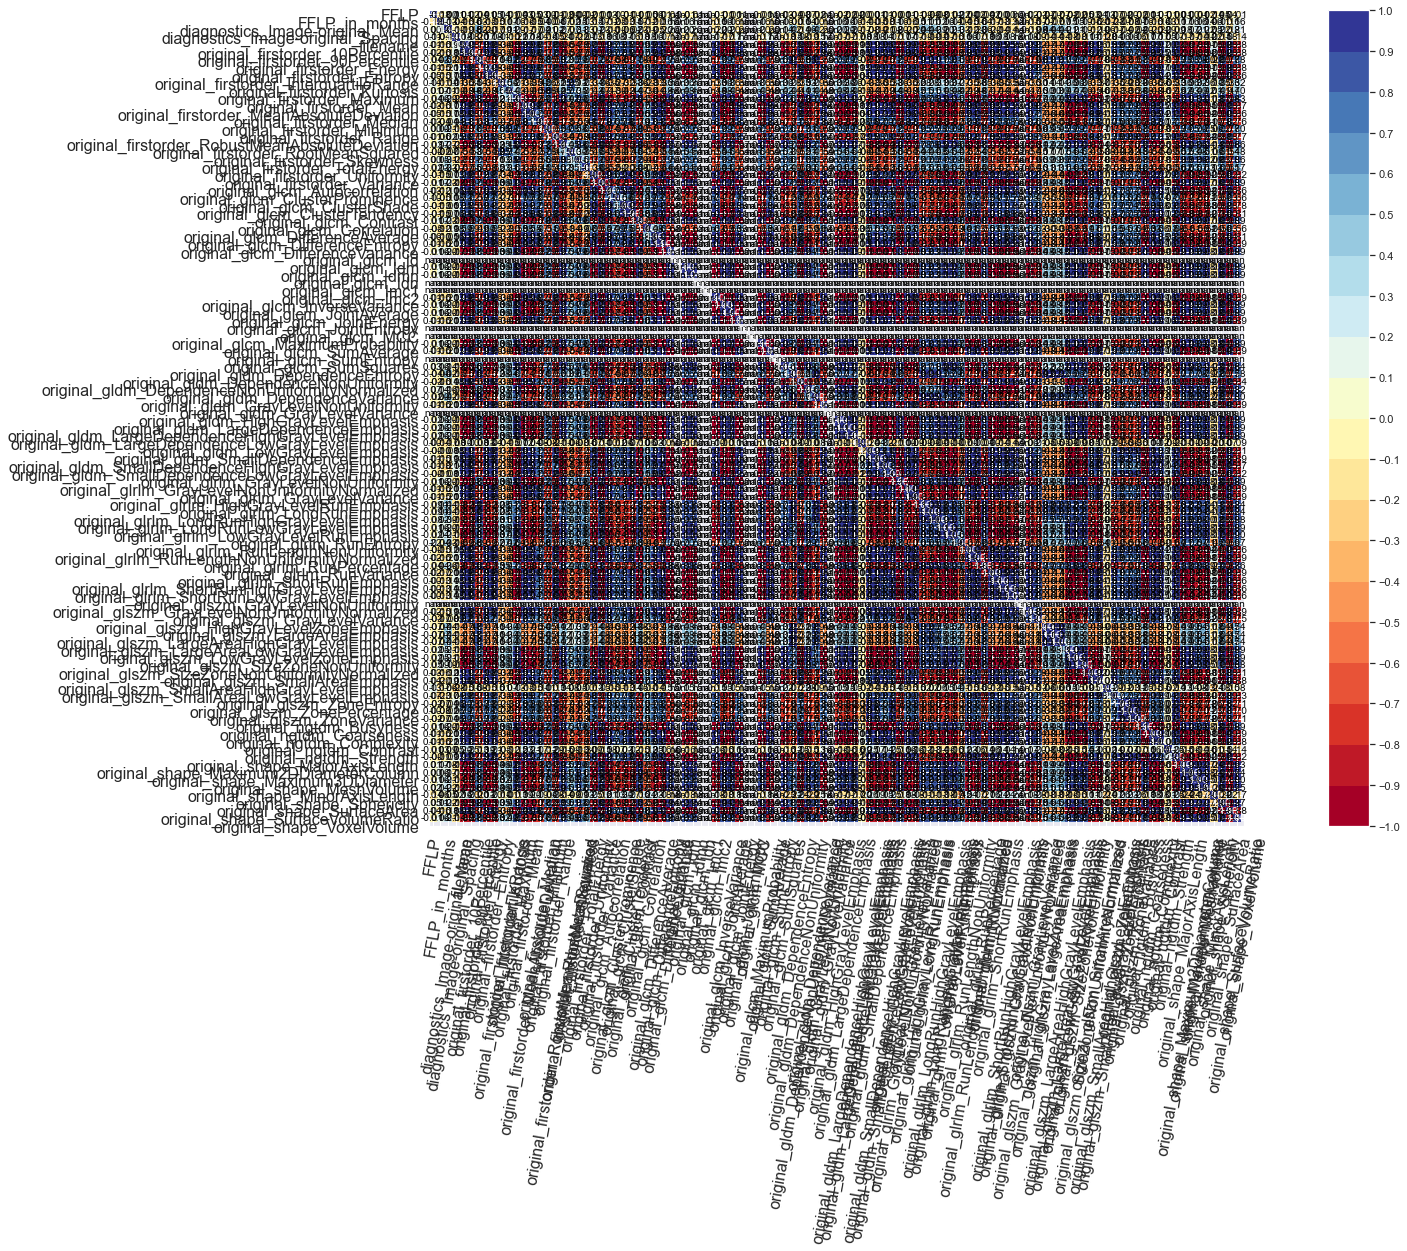

In [29]:
#visualize the correlation matrix
from pysurvival.utils.display import correlation_matrix
correlation_matrix(data2[features], figure_size=(30,15), text_fontsize=10)

#### Now we are ready to analyze our data 
 we need to define our input (X), time (T) and event (E) columns


In [30]:
# Creating the X, T and E inputs
X = data2[features]

newX=np.setdiff1d(data2.columns, [ event_column]).tolist()
X=data2[newX]
E=data2['event column']

KeyError: 'event column'

### Now we are ready to perform the random forest survival analysis
#### In this example we are using the 10 Stratified Kfold and and evaluating the performance of each run by 
#### evaluating the concordance and plotting the predicted survival curve and error


 1 of kfold 10
C-index: 0.69


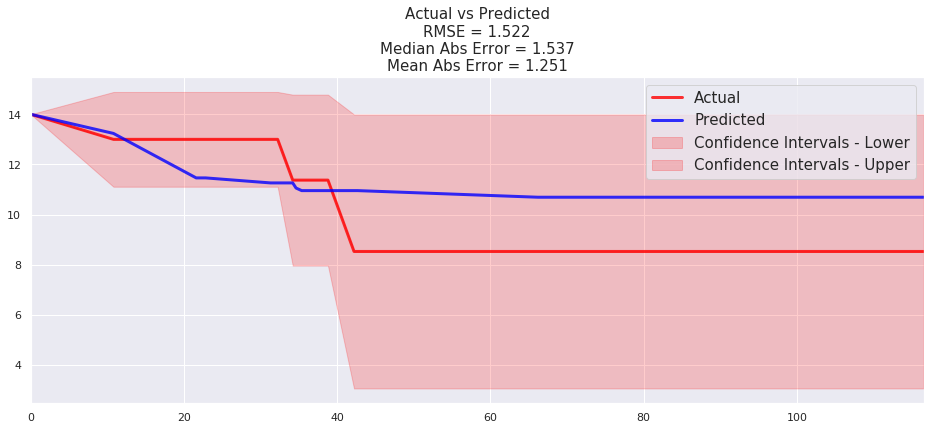

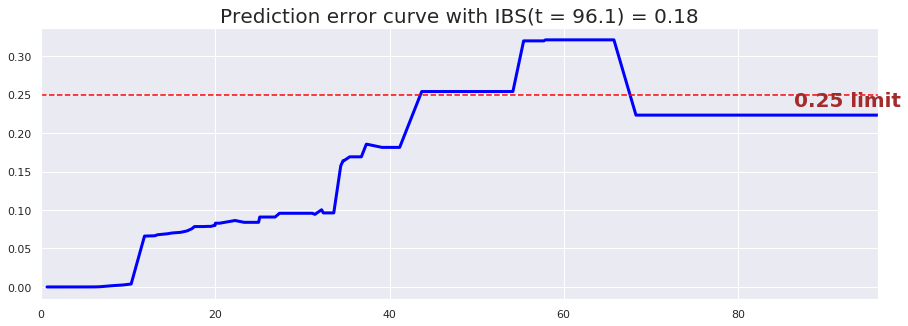

IBS: 0.18

 2 of kfold 10
C-index: 0.68


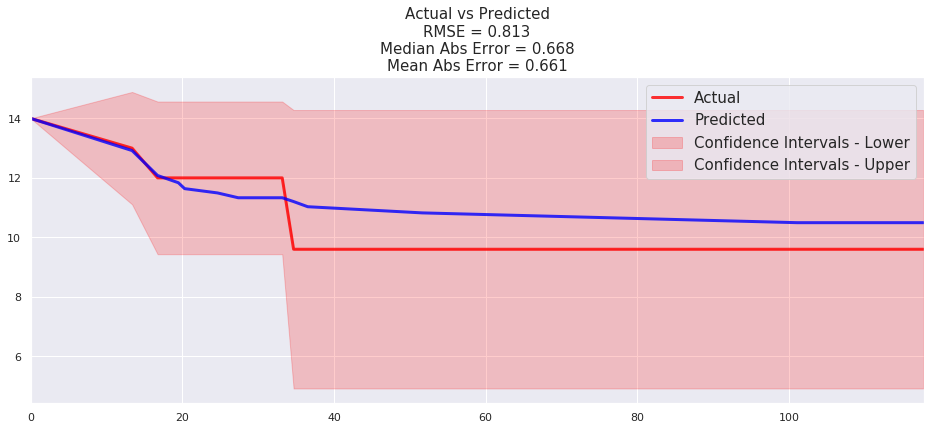

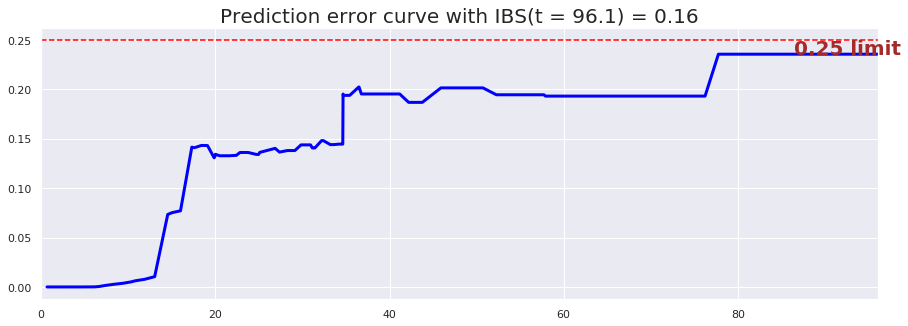

IBS: 0.16

 3 of kfold 10
C-index: 0.76


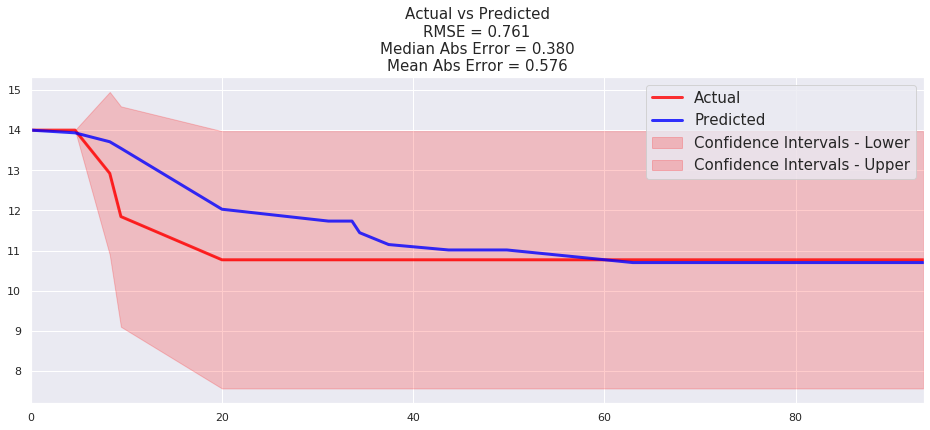

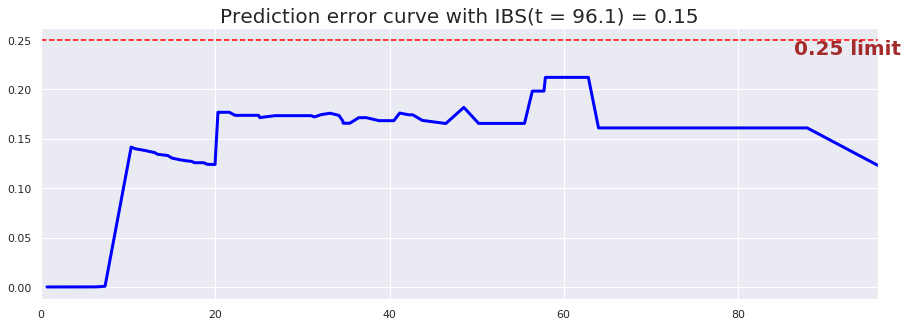

IBS: 0.15

 4 of kfold 10
C-index: 0.58


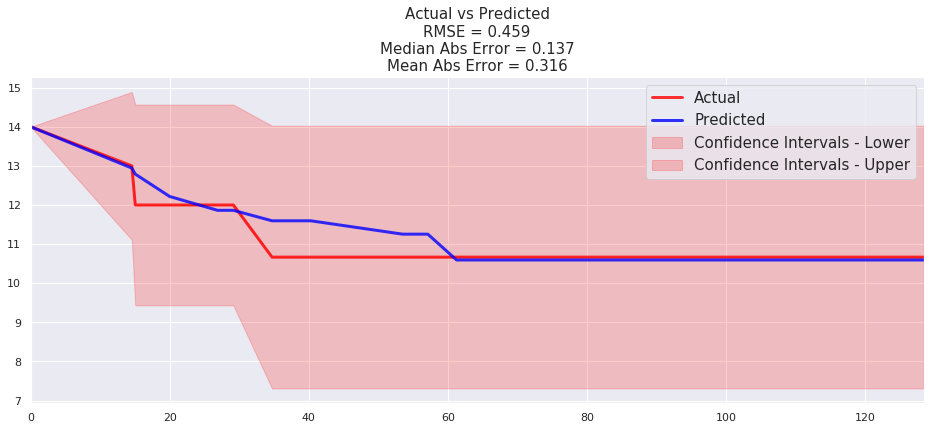

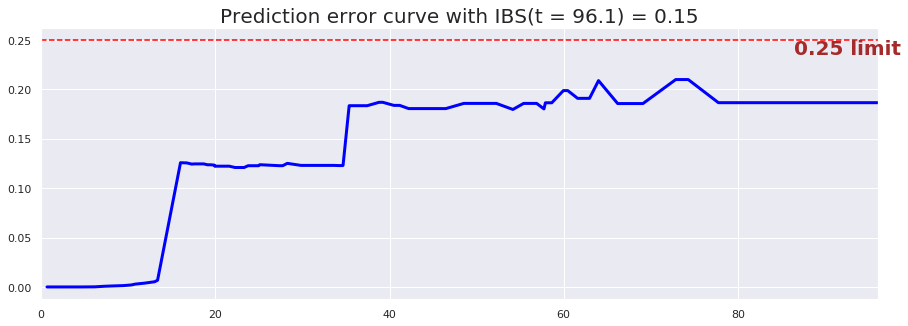

IBS: 0.15

 5 of kfold 10
C-index: 0.58


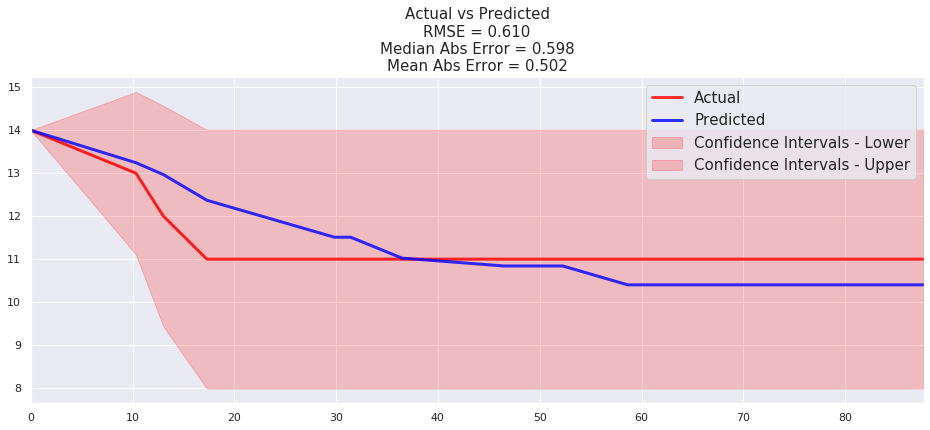

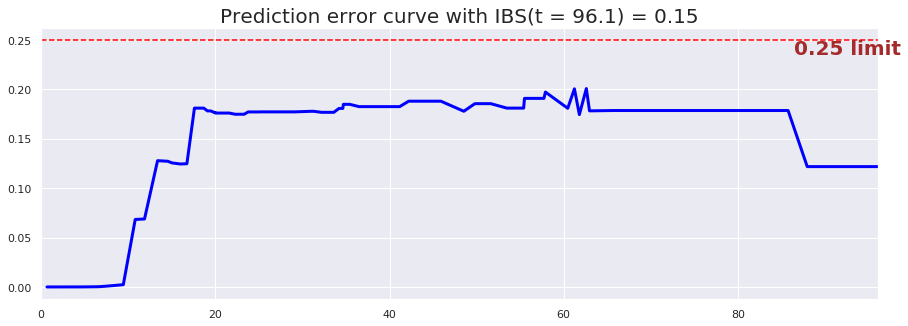

IBS: 0.15

 6 of kfold 10
C-index: 0.74


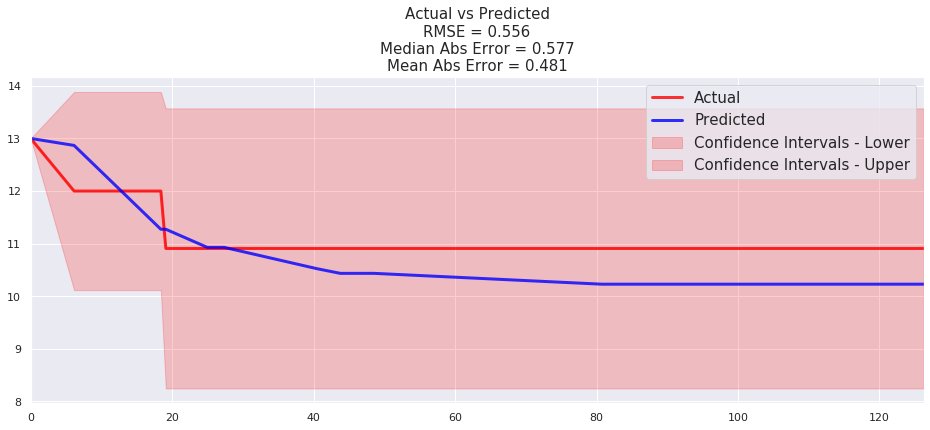

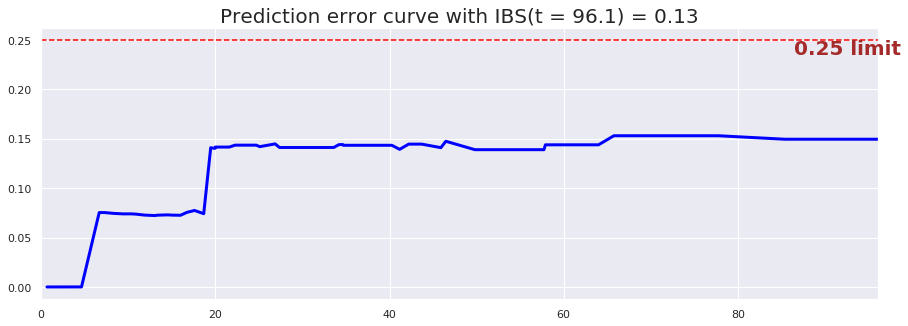

IBS: 0.13

 7 of kfold 10
C-index: 0.65


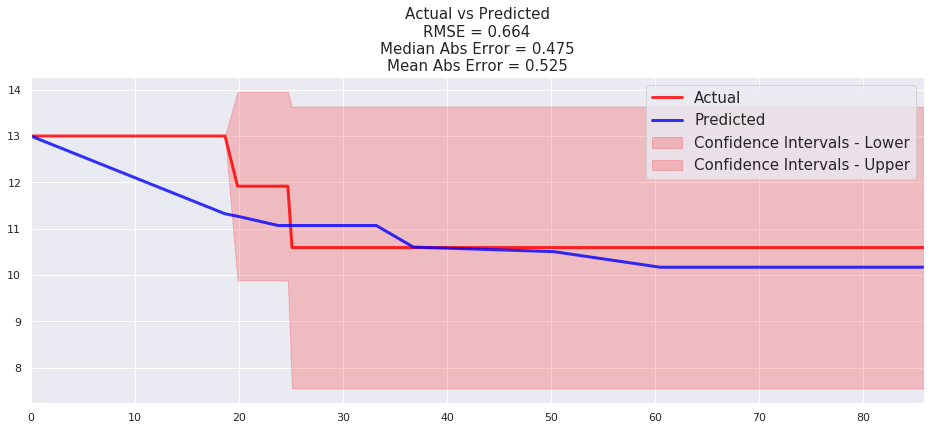

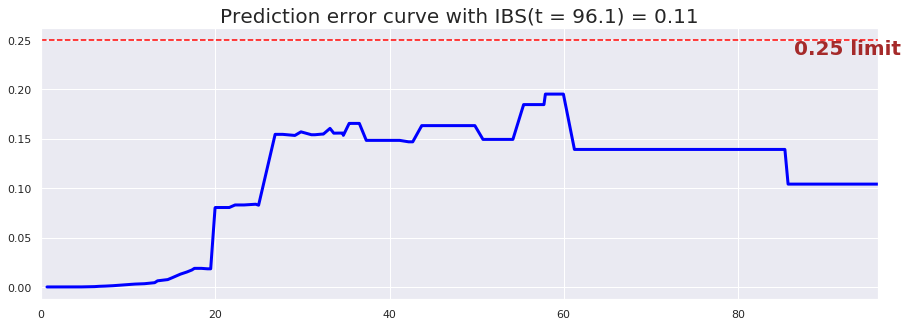

IBS: 0.11

 8 of kfold 10
C-index: 0.52


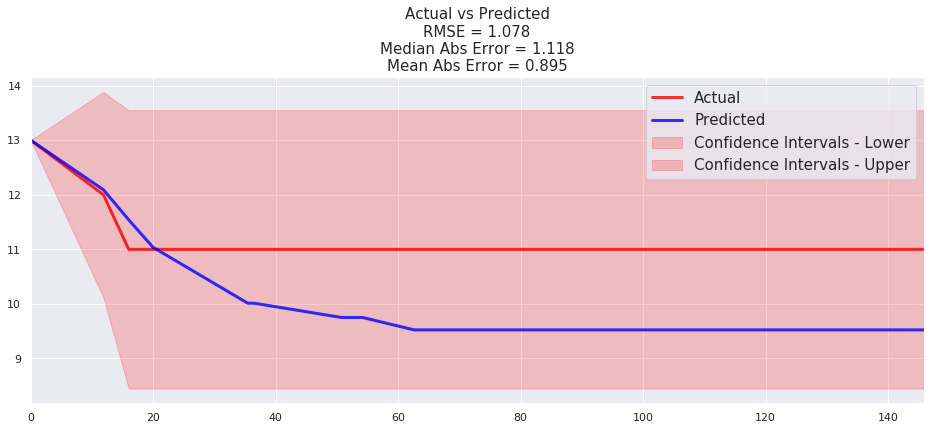

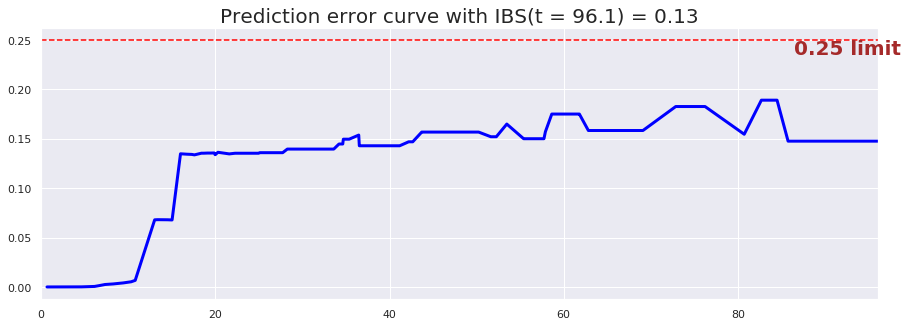

IBS: 0.13

 9 of kfold 10
C-index: 0.83


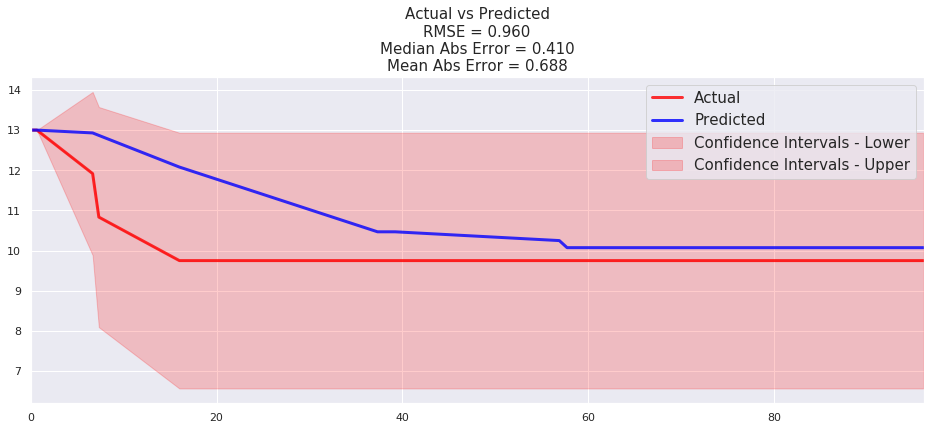

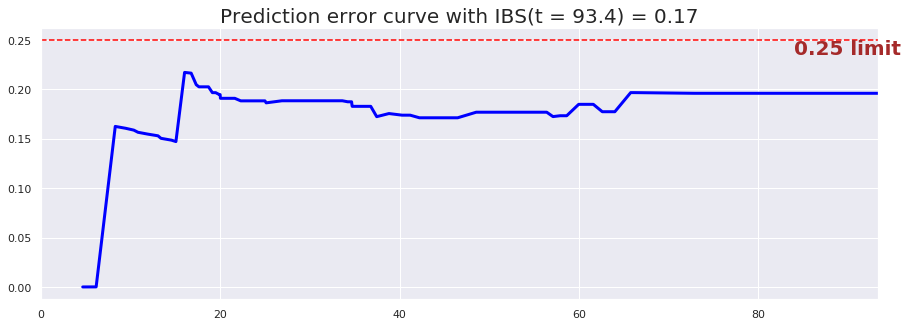

IBS: 0.17

 10 of kfold 10
C-index: 0.60


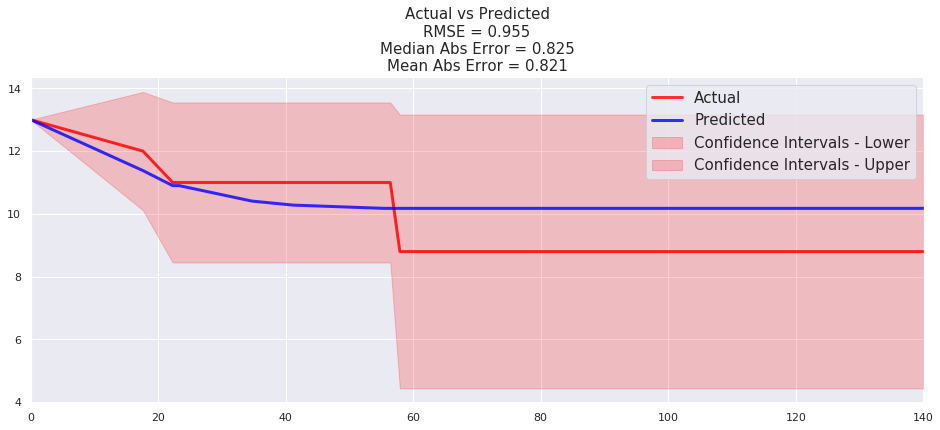

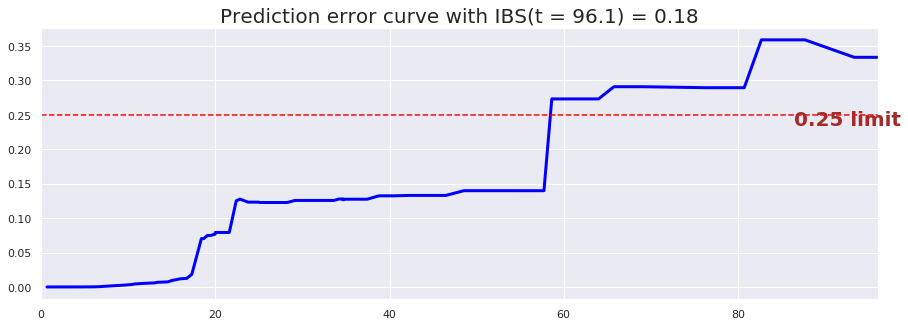

IBS: 0.18


In [16]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,E):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=X.loc[train_index], X.loc[test_index]
    X_train, X_test=X1_train[features], X1_test[features]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=E.loc[train_index].values, E.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1
   
    

### the importance table allows you to identify the main contributing features

In [17]:
xst.variable_importance_table.head(20)
#the results indicate that we only had 3 variables which were important features

feature  importance  pct_importance
0      FD51    1.054093        0.182265
1    LBP101    1.054093        0.182265
2    LBP112    1.054093        0.182265
3    LBP116    1.054093        0.182265
4      FD54    0.974235        0.168456
5      FD27    0.592703        0.102485
6   ACM1_12    0.000000        0.000000
7    LBP106    0.000000        0.000000
8    LBP107    0.000000        0.000000
9    LBP108    0.000000        0.000000
10   LBP118    0.000000        0.000000
11   LBP119    0.000000        0.000000
12   LBP120    0.000000        0.000000
13    LBP94    0.000000        0.000000

In [20]:

data3=data2.loc[:, ['LBP94', 'LBP116',
       'FD51',, 'event column']]
data3

LBP94    LBP116      FD51  time column  event column
0    0.008640  0.010616  0.079923    72.866667           0.0
1    0.007668  0.022017  0.128958    57.733333           0.0
2    0.021092  0.010747  0.056418    69.100000           0.0
3    0.016198  0.009453  0.141440    39.233333           0.0
4    0.009955  0.014629  0.157050    20.000000           1.0
..        ...       ...       ...          ...           ...
130  0.022039  0.008869  0.087100    22.400000           0.0
131  0.012268  0.006853  0.055196     8.266667           1.0
132  0.015814  0.008804  0.100156    18.666667           0.0
133  0.019432  0.009172  0.112976    20.300000           0.0
134  0.038723  0.008527  0.100414    19.966667           0.0

[135 rows x 5 columns]

In [27]:
# Creating the X, T and E inputs
Xnew = data3[['LBP94', 'LBP116','FD51', 'time column']]
features2=['LBP94', 'LBP116','FD51']

Xnew[features2]
Enew=data3['event column']
Enew
Xnew['time column']

0      72.866667
1      57.733333
2      69.100000
3      39.233333
4      20.000000
         ...    
130    22.400000
131     8.266667
132    18.666667
133    20.300000
134    19.966667
Name: time column, Length: 135, dtype: float64


 1 of kfold 10
C-index: 0.59


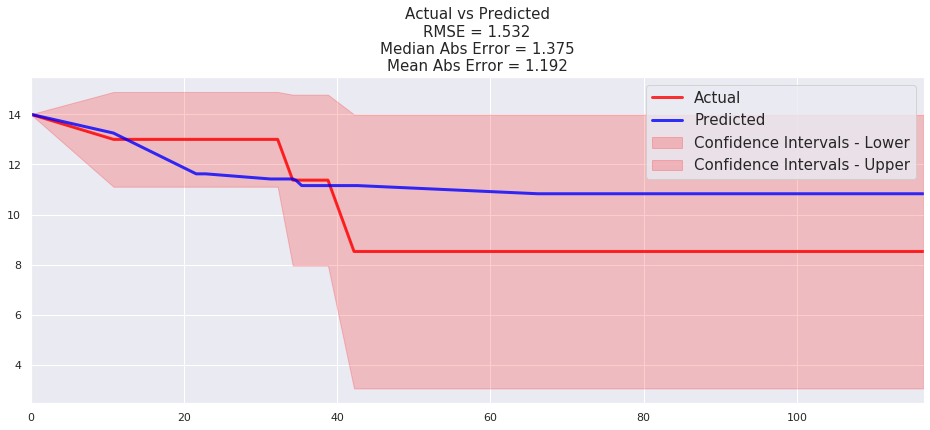

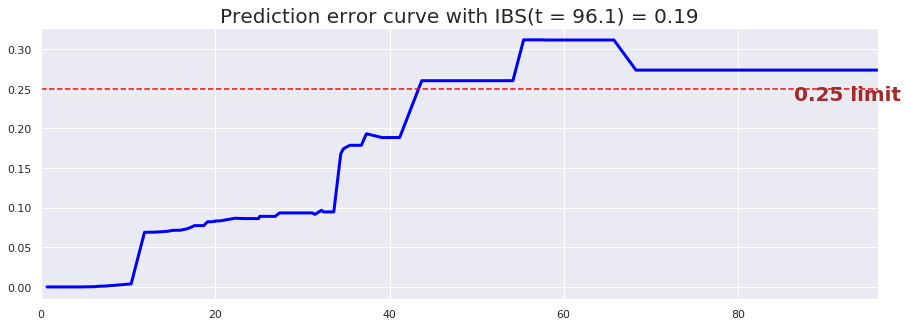

IBS: 0.19

 2 of kfold 10
C-index: 0.70


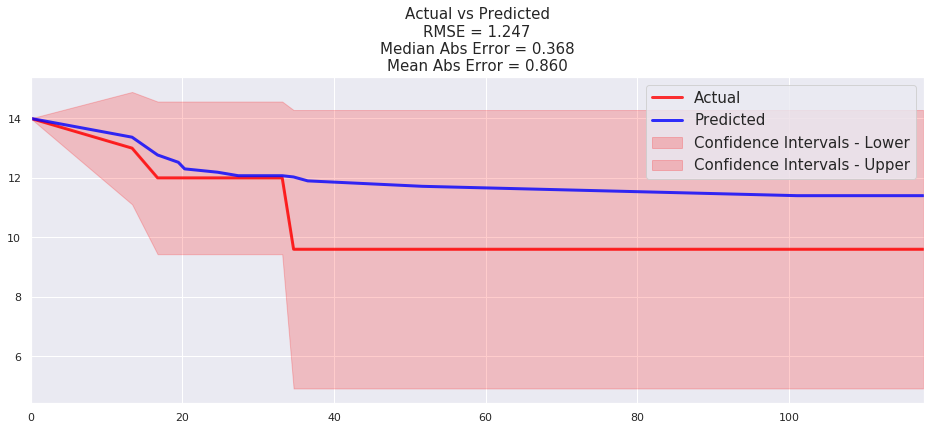

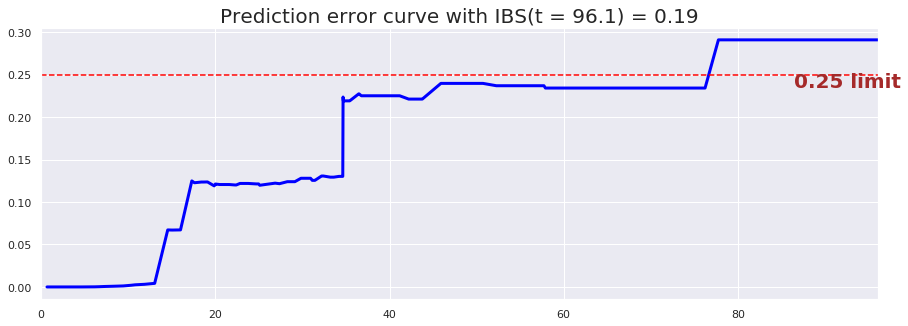

IBS: 0.19

 3 of kfold 10
C-index: 0.62


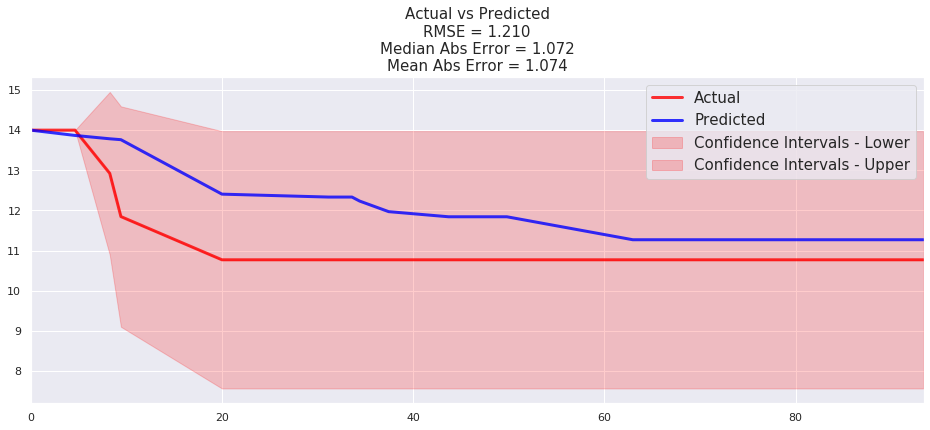

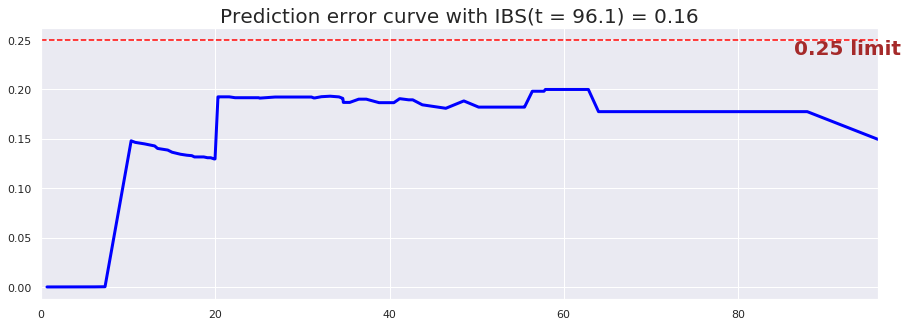

IBS: 0.16

 4 of kfold 10
C-index: 0.70


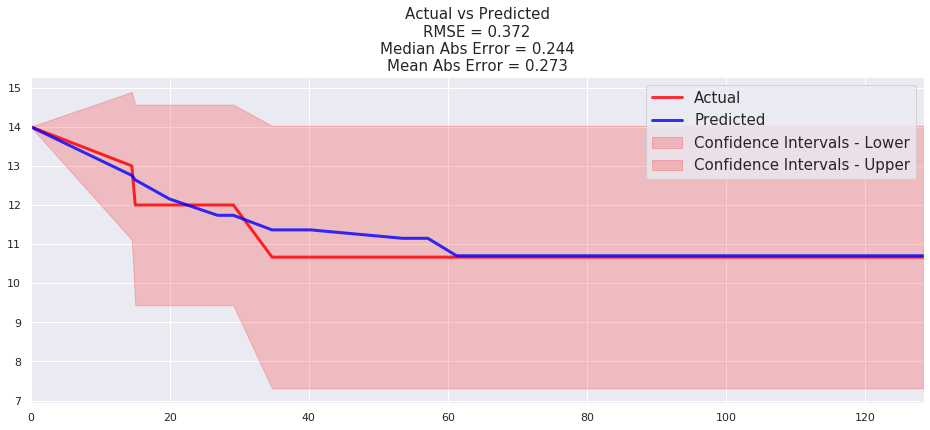

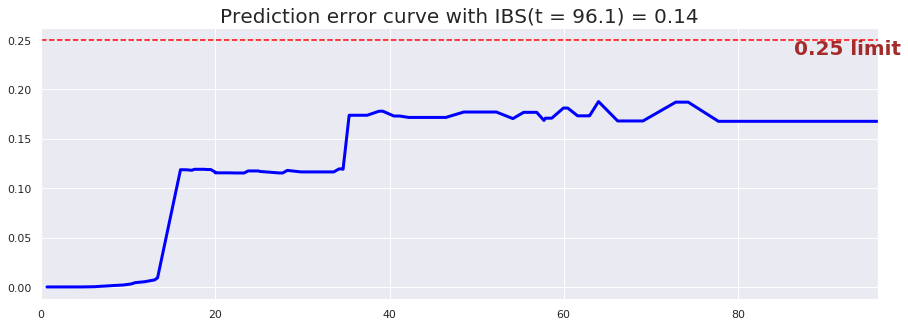

IBS: 0.14

 5 of kfold 10
C-index: 0.89


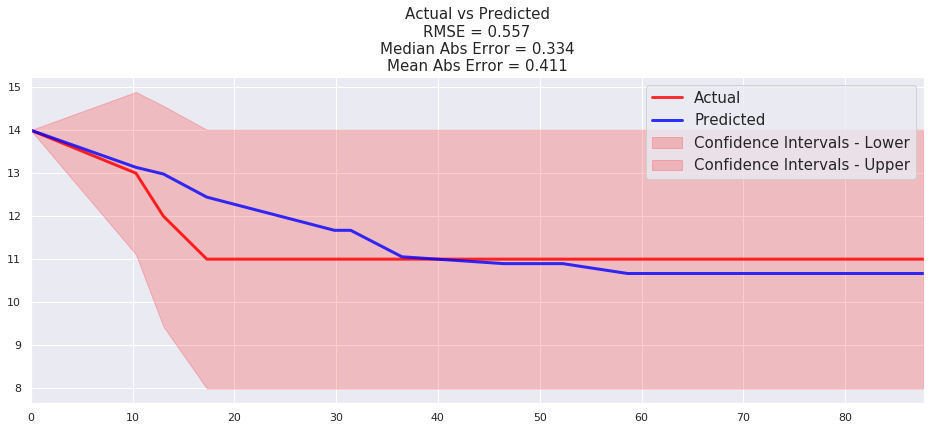

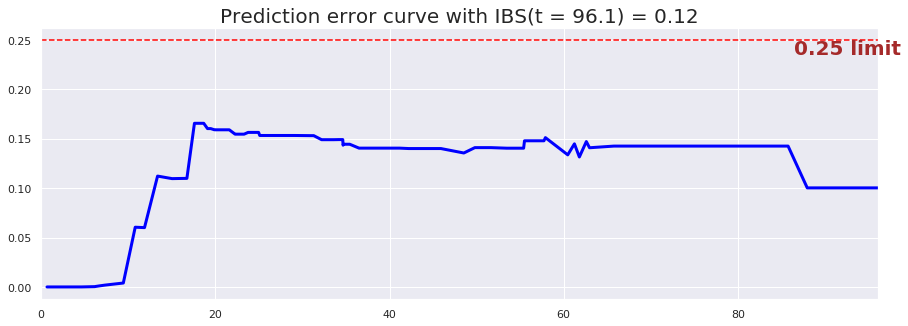

IBS: 0.12

 6 of kfold 10
C-index: 0.85


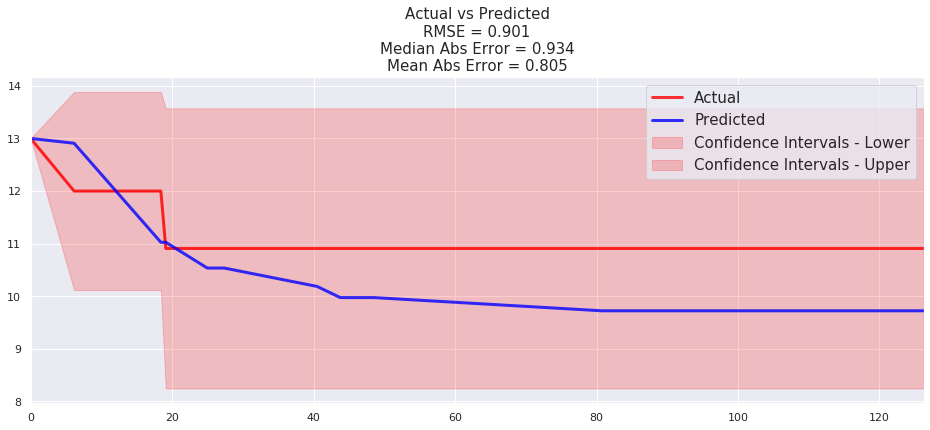

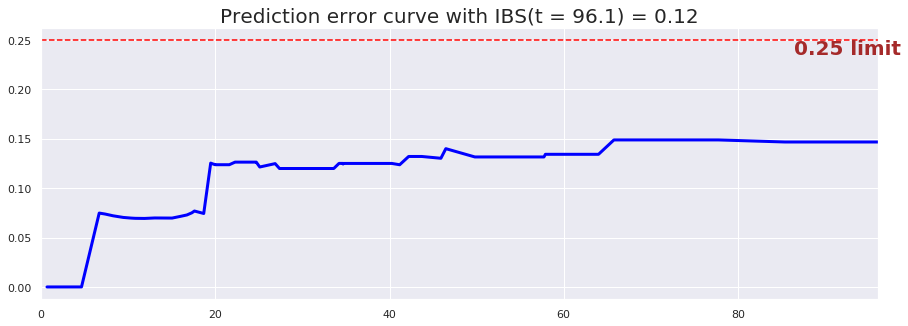

IBS: 0.12

 7 of kfold 10
C-index: 0.91


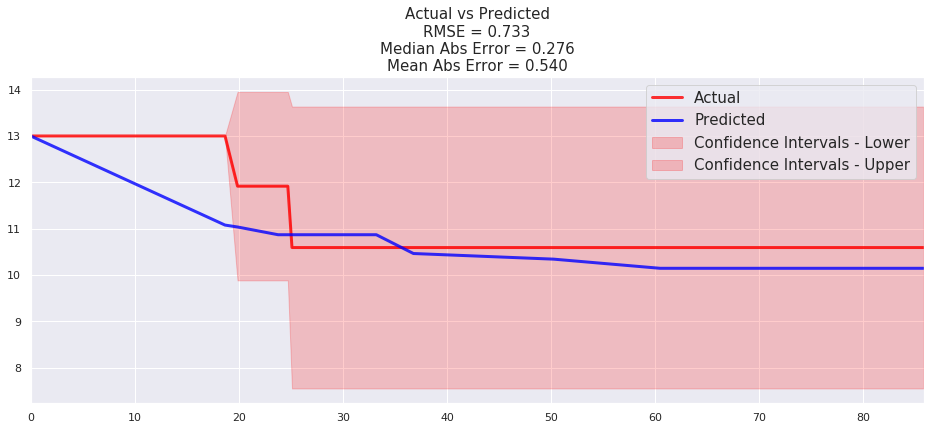

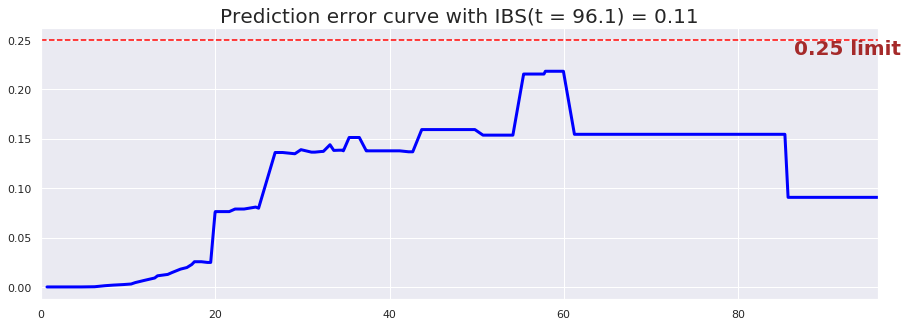

IBS: 0.11

 8 of kfold 10
C-index: 0.52


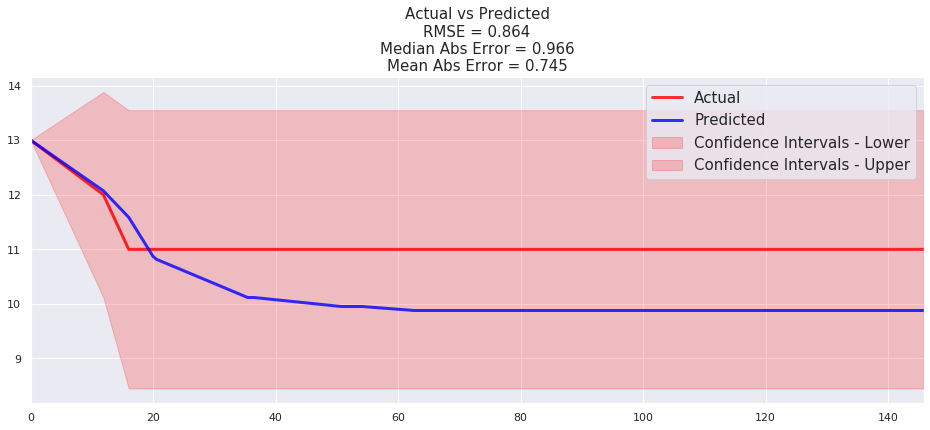

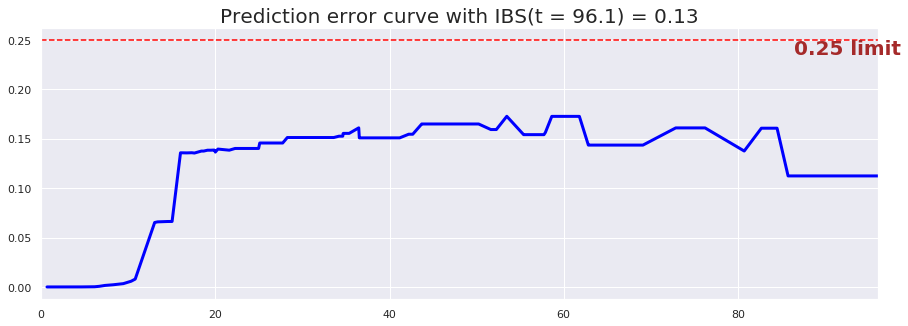

IBS: 0.13

 9 of kfold 10
C-index: 0.55


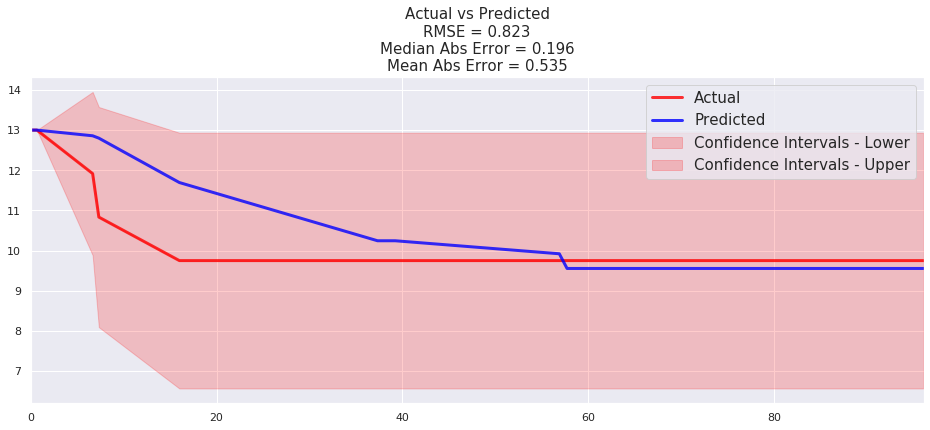

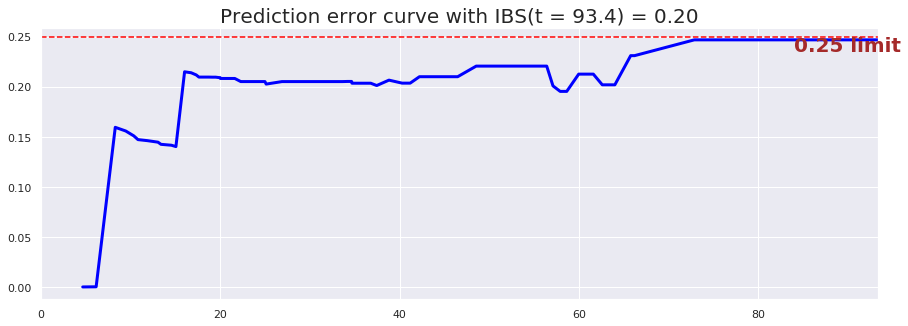

IBS: 0.20

 10 of kfold 10
C-index: 0.53


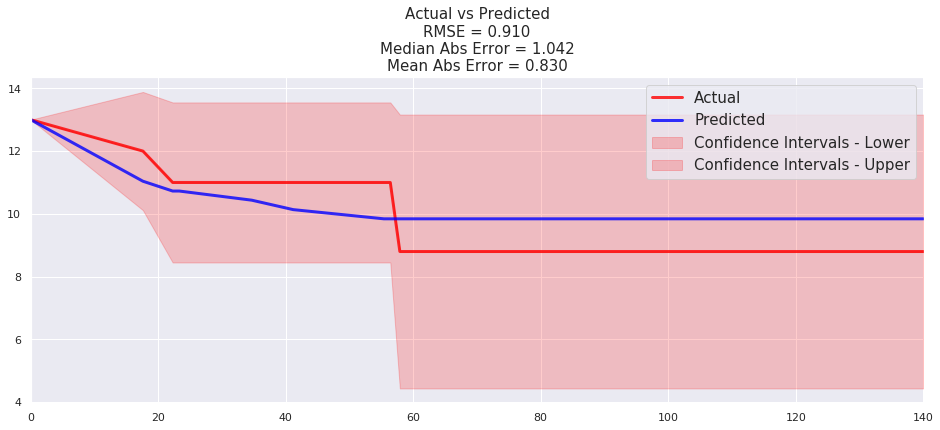

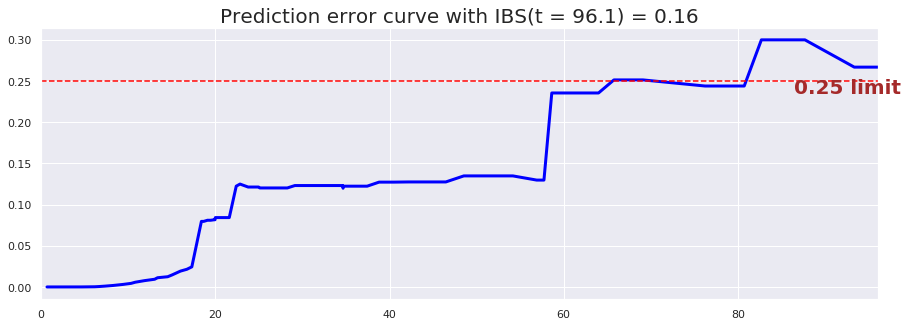

IBS: 0.16


In [28]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(Xnew,Enew):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
    X_train, X_test=X1_train[features2], X1_test[features2]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1

#### Below is an example on how to perform a grid search for the optimal RF parameters

In [29]:
num_tree=(10, 15, 20, 50, 100, 200)
max_depth=(1, 3, 5, 7, 9, 10, 20)
min_node=(2, 5, 10, 15, 20)


In [4]:
# this script searches the RF paramters listed in the cell 29
#prints out the average of 10 K Fold concordance
from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from statistics import mean 

for a in num_tree:
    for b in max_depth:
        for c in min_node:
            cc=[]
            kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
            i=1
            for train_index, test_index in kf.split(Xnew,Enew):
                X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
                X_train, X_test=X1_train[features2], X1_test[features2]
                T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
                E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
                xst = RandomSurvivalForestModel(num_trees=a) 
                xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = b,
                min_node_size = c, num_threads = -1, 
                sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
                seed = None, save_memory=False )
                from pysurvival.utils.metrics import concordance_index
                c_index = concordance_index(xst, X_test, T_test, E_test)
                cc.append(c_index)
                i=i+1
            print(a,b, c, mean(cc))
                 

NameError: name 'num_tree' is not defined